<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis María Ramirez de la Rosa

**Fecha:** 06 de octubre del 2020.

**Expediente** : IF691761
    
**Profesor:** Oscar David Jaramillo Zuluaga. 
   
**Link:** https://github.com/luismaria8992ramirez/SPF_LMRR_Tareas_7_8_9/blob/main/Tarea_8_LMRamirez.ipynb 
    
# Tarea 8

<img src="IMG.png">

## Respuesta de: LMRamirez

$$ f(x) =
  \begin{cases}
    {\frac{3}{2}x^2}       & \text{if }-1\leq x \leq 1\\
    0  &  otherwise
  \end{cases}
$$

El valor esperado de $f(x)$ esta dado por: 
$$E[x] = \int_{-\infty}^{-\infty} x f(x) dx = \int_{-1}^{1} x \frac{3}{2} x^{2} dx = \frac{3}{2} \int_{-1}^{1}  x^{3} dx = \frac{3}{2} \frac{x^{4}}{4} \Big|_{-1}^{1} = \frac{3}{8} [1 - 1] = 0$$

La función de distribución acumulada sería:
$$F(x) =  \int_{-\infty}^{x} f(x) dx = \int_{-1}^{x} \frac{3}{2} x^{2} dx = \frac{3}{2} \int_{-1}^{x} x^{2} dx = \frac{3}{2} \frac{x^{3}}{3} \Big|_{-1}^{x} = \frac{x^{3}}{2} \Big|_{-1}^{x} = \frac{x^{3}}{2} - \frac{-1}{2} = \frac{x^{3} + 1}{2}$$

Método de la transformada inversa:
$$y = \frac{x^{3} + 1}{2} \longrightarrow 2y = x^{3} + 1 \longrightarrow 2y - 1 = x^{3} \longrightarrow x = [2y - 1]^{\frac{1}{3}}$$
Que está definida de la siguiente forma $-[- 2y + 1]^{\frac{1}{3}}$ si $y \leq 0.5$ y $[2y - 1]^{\frac{1}{3}}$ si $y \geq 0.5$

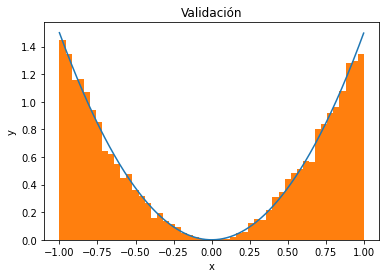

Se observa que el valor esperado o media es igual a 0


In [3]:
# Clase 9, trasformada inversa
np.random.seed(1)  # Para que siempre sean los mismos numeros aleatorios
N = 10000 # Número de muestras
a = -1  # intervalo de integración (Limite inferior)
b = 1  # intervalo de integración (Limite superior)
f = lambda x: (3/2)*x**2 if x<=1 and x>=-1 else 0  # Función Inicial
xi = lambda x: -(-2*x+1)**(1/3) if x<.5 else (2*x-1)**(1/3)  # Función usando transformada inversa
# Validación de la función
x = np.arange(a,b,0.001)  # Valores en x
plt.plot(x,list(map(f,x)))  # Grafica de la función Inicial
u = np.random.rand(N)  # Valores para la Función de la Transformada Inversa
randon_f = list(map(xi,u))  # Lista de valores de la función de la Transformada Inversa
plt.hist(randon_f, 50, density=True)  # Grafica de la Función de la Transformada Inversa
plt.title('Validación')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print('Se observa que el valor esperado o media es igual a 0')

In [4]:
# Generamos los 10 numeros aleatorios
N = 10
np.random.seed(1)
u1 = np.random.rand(N)

In [5]:
# a) Usando montecarlo crudo
mean_mon_crudo = np.mean(list(map(xi,u1)))
print('Estimacíon de la media =',mean_mon_crudo)
print('Se observa que el valor esperado o media es similar al teórico: 0')

Estimacíon de la media = -0.5043806672123164
Se observa que el valor esperado o media es similar al teórico: 0


In [6]:
# b) Usando muestreo estratificado 1
r1 = u1[0:3]
r2 = u1[3:6]
r3 = u1[6:]
r = [r1,r2,r3]
m = range(len(r))  # Cantidad de estratos
w = [((len(r1)/N)/(0.6-0)), ((len(r2)/N)/(0.9-0.6)), ((len(r3)/N)/(1-0.9))]
estrat1 = list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,estrat1))
print('Estimacíon de la media =', np.concatenate(muestras).mean())
print('Se observa que el valor esperado o media es similar al teórico: 0')

Estimacíon de la media = -0.4559904610081392
Se observa que el valor esperado o media es similar al teórico: 0


In [7]:
# c) Aleatorios Complementarios
u_comp = 1-u1
mean_aux = np.mean(list(map(xi,u_comp)))
mean_nume_compleme = (mean_mon_crudo+mean_aux)/2
print('Estimacíon de la media =',mean_nume_compleme)
print('Se observa que el valor esperado o media es igual al teórico: 0')

Estimacíon de la media = 0.0
Se observa que el valor esperado o media es igual al teórico: 0


In [8]:
# d) Método muestreo estratificado (B estratos)
B = [2,4,6,10]  # Cantidad de estratos
muestras = list(map(est,B))  # Muestras para cada estrato 
aleatorios_f = list(map(lambda m_i:list(map(lambda m:xi(m),m_i)),muestras))  # Evalúo las muestras creadas (son 2 "map" por que 'muestras' es una lista de listas)
prom_estratos = list(map(lambda ei:np.mean(ei),aleatorios_f))  # Calculo la media para cada estrato
res = list(map(lambda b, prom:print('Estimacíon de la media para %i estratos es %2.4f' %(b, prom)), B, prom_estratos))

Estimacíon de la media para 2 estratos es 0.0236
Estimacíon de la media para 4 estratos es -0.0443
Estimacíon de la media para 6 estratos es -0.0249
Estimacíon de la media para 10 estratos es -0.0315
